Initial Random Dataset (first 5 rows):
   Col_1  Col_2  Col_3  Col_4  Col_5  Col_6  Col_7  Col_8  Col_9  Col_10  ...  \
0    103    180     93     15    107     72    189     21    103     122  ...   
1     89     49     59    170    188     15    190    190    175     190  ...   
2     92    111    188    199    172      8    175     35     81     164  ...   
3     40     82    111     53     24    154    188    124     41     157  ...   
4    135     72     12    162     33     48    151     62     37      99  ...   

   Col_21  Col_22  Col_23  Col_24  Col_25  Col_26  Col_27  Col_28  Col_29  \
0      88     158      38     130     192     188      21     161      58   
1      18     132      89      60      14       9      90      53     130   
2     146      44     162     190      14      95      48      15     200   
3     139      81     136     163     163      33     123       5      41   
4     103      27     137      15      90      42     124     179      63   

   Col_30  

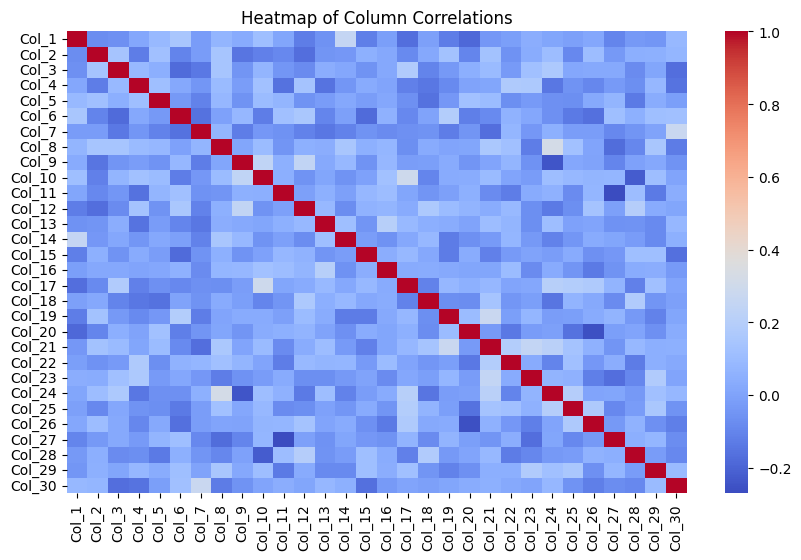


Step 4: Number of correlations <= 0.7 for each column:
Col_1     29
Col_2     29
Col_3     29
Col_4     29
Col_5     29
Col_6     29
Col_7     29
Col_8     29
Col_9     29
Col_10    29
Col_11    29
Col_12    29
Col_13    29
Col_14    29
Col_15    29
Col_16    29
Col_17    29
Col_18    29
Col_19    29
Col_20    29
Col_21    29
Col_22    29
Col_23    29
Col_24    29
Col_25    29
Col_26    29
Col_27    29
Col_28    29
Col_29    29
Col_30    29
dtype: int64

Total columns having average correlation ≤ 0.7: 30

Step 5: Normalized Dataset (0–10 range):
      Col_1     Col_2     Col_3      Col_4     Col_5     Col_6     Col_7  \
0  5.102041  8.963731  4.595960   6.385415  5.329949  3.585859  9.641026   
1  4.387755  6.085426  5.457742   8.527919  9.441624  6.064113  9.692308   
2  4.540816  5.388601  9.393939  10.000000  8.629442  0.353535  8.923077   
3  6.485555  3.886010  5.505051   6.385415  6.031006  7.727273  9.589744   
4  6.734694  3.367876  5.457742   8.121827  6.031006  6.064113  7.6

C:\Users\ASHAVPREET\AppData\Local\Temp\ipykernel_29564\4140453765.py:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_norm.applymap(lambda x: 0 if x <= 5 else 1)
C:\Users\ASHAVPREET\AppData\Local\Temp\ipykernel_29564\4140453765.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_binary.melt(value_name="BinaryValue"), x="BinaryValue", palette="Set2")


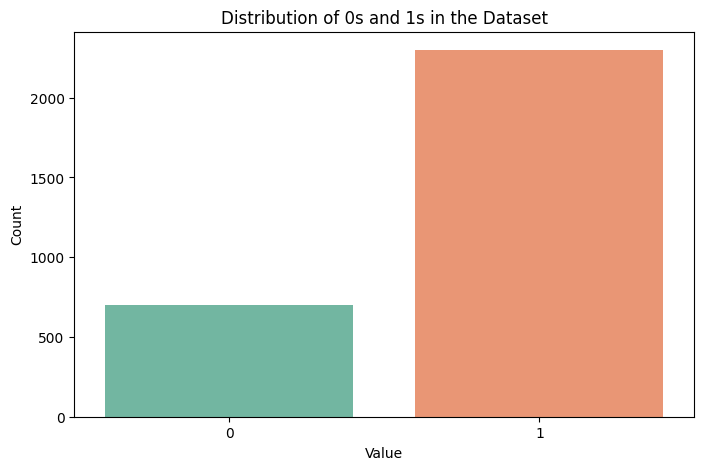

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)  
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)), 
                  columns=[f"Col_{i+1}" for i in range(30)])

print("Initial Random Dataset (first 5 rows):")
print(df.head())

df_masked = df.mask((df >= 10) & (df <= 60))

# Count NAs in each row and column
na_per_row = df_masked.isna().sum(axis=1)
na_per_col = df_masked.isna().sum(axis=0)

print("\nStep 1: Count of NaN values in each row:")
print(na_per_row.head())

print("\nStep 1: Count of NaN values in each column:")
print(na_per_col)

df_filled = df_masked.apply(lambda x: x.fillna(x.mean()), axis=0)

print("\nStep 2: Dataset after replacing NaN with column mean:")
print(df_filled.head())

plt.figure(figsize=(10, 6))
sns.heatmap(df_filled.corr(), cmap="coolwarm", annot=False)
plt.title("Heatmap of Column Correlations")
plt.show()

corr_matrix = df_filled.corr()
less_corr_cols = (corr_matrix <= 0.7).sum(axis=0)
print("\nStep 4: Number of correlations <= 0.7 for each column:")
print(less_corr_cols)

cols_with_low_corr = (corr_matrix.mean() <= 0.7).sum()
print(f"\nTotal columns having average correlation ≤ 0.7: {cols_with_low_corr}")

df_norm = df_filled.copy()
for col in df_norm.columns:
    min_val = df_norm[col].min()
    max_val = df_norm[col].max()
    df_norm[col] = 10 * (df_norm[col] - min_val) / (max_val - min_val)

print("\nStep 5: Normalized Dataset (0–10 range):")
print(df_norm.head())


df_binary = df_norm.applymap(lambda x: 0 if x <= 5 else 1)

print("\nStep 6: Binary (0/1) Dataset:")
print(df_binary.head())

plt.figure(figsize=(8, 5))
sns.countplot(data=df_binary.melt(value_name="BinaryValue"), x="BinaryValue", palette="Set2")
plt.title("Distribution of 0s and 1s in the Dataset")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()
